In [1]:
from sklearn.datasets import load_wine
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
symbol_data_to_load = ['D','EXC','NEE','SO','DUK']
list_of_df = []

In [65]:
for i in symbol_data_to_load:
    tempo_df= pd.read_csv(i+".csv", sep=",")
    tempo_df['Volume_Millions'] = tempo_df['Volume'] / 1000000
    tempo_df['Symbol'] = i
    list_of_df.append(tempo_df)

In [66]:
agg_df= pd.concat(list_of_df, axis=0)

In [67]:
agg_df['VolStat'] = (agg_df['High'] - agg_df['Low'])/ agg_df['Open']
agg_df['Return'] = (agg_df['Close'] / agg_df['Open']) - 1

In [68]:
print('Shape del dataframe final:')
print(agg_df.shape)

Shape del dataframe final:
(6295, 11)


In [69]:
df = agg_df

In [70]:
l = [x for x in df.columns if x not in ['Date', 'Volume', 'Symbol']]
print(l)

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume_Millions', 'VolStat', 'Return']


In [71]:
df[l]

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861
...,...,...,...,...,...,...,...,...
1254,88.599998,88.690002,87.839996,88.150002,88.150002,2.1603,0.009594,-0.005079
1255,88.180000,88.239998,87.370003,87.680000,87.680000,3.1418,0.009866,-0.005670
1256,87.949997,87.980003,86.800003,87.180000,87.180000,2.3865,0.013417,-0.008755
1257,86.900002,87.389999,86.169998,86.489998,86.489998,2.6803,0.014039,-0.004718


0 Open
1 High
2 Low
3 Close
4 Adj Close
5 Volume_Millions
6 VolStat
7 Return


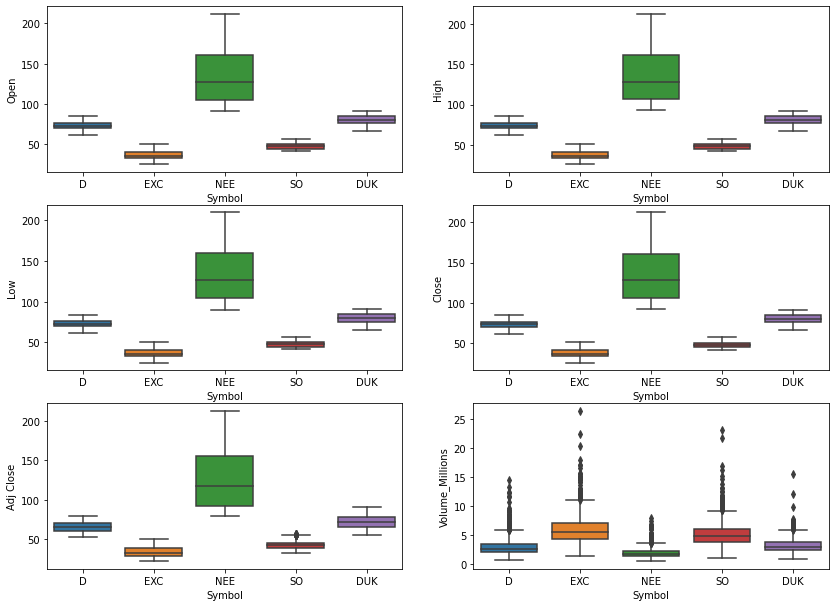

In [73]:
plt.figure(figsize=(14,14))
for x, column in zip(range(8), agg_df[l]):
    if column != 'Symbol':
        #print(x, column)
        if x<=5:
            plt.subplot(4,2,x+1)
            sns.boxplot(data=agg_df[l], y=column, x = agg_df['Symbol'])

In [74]:
datos = df[l]
datos.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


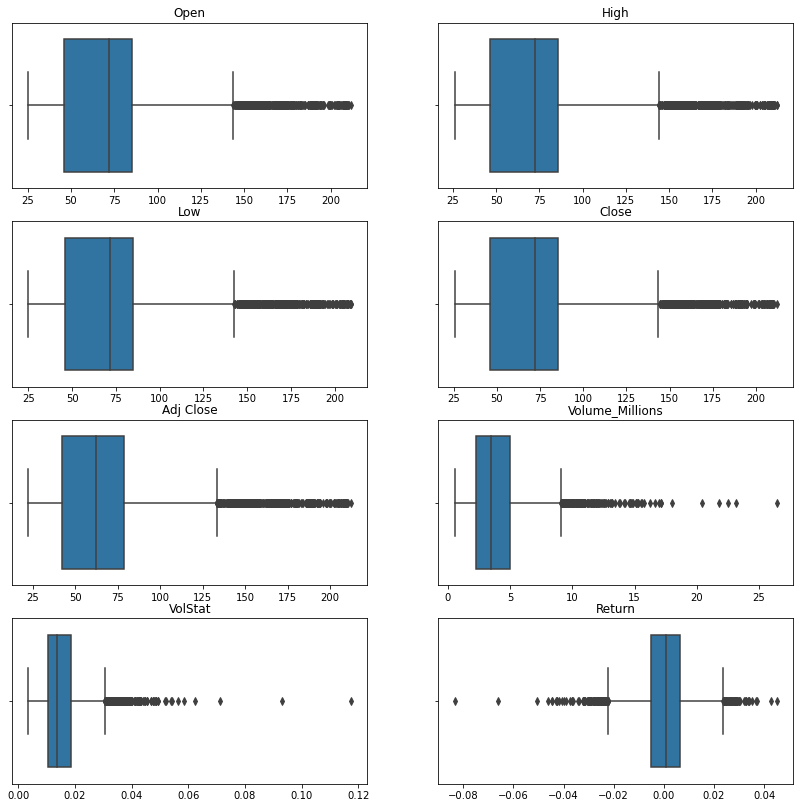

In [75]:
plt.figure(figsize=(14,14))
for x,j in zip(range(8), datos.columns):
    plt.subplot(4,2,x+1)
    sns.boxplot(x=datos[j])
    plt.title(j)
    plt.xlabel("")

Z-Score

In [76]:
# cargar los datos
datos = agg_df[agg_df['Symbol'] == 'D']
l=[x for x in agg_df.columns if x not in ['Volume', 'Symbol']]
datos = datos[l]
datos['Date'] = pd.to_datetime(datos['Date'])
datos.head()

,Date,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,2014-07-28,69.750000,71.059998,69.750000,70.879997,57.963978,1.8064,0.018781,0.016201
1,2014-07-29,70.669998,70.980003,69.930000,69.930000,57.187099,2.2311,0.014858,-0.010471
2,2014-07-30,70.000000,70.660004,68.400002,68.970001,56.402020,2.5889,0.032286,-0.014714
3,2014-07-31,68.629997,68.849998,67.580002,67.639999,55.314388,3.2669,0.018505,-0.014425
4,2014-08-01,67.330002,68.410004,67.220001,67.589996,55.273487,2.6018,0.017674,0.003861


In [77]:
datos_z = pd.DataFrame()
for j in datos.columns[1:]:
    datos_z[j] = (datos[j] - datos[j].mean())/ datos[j].std()
    datos_z['Fecha'] = datos['Date']
datos_z.head()

,Open,Fecha,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,2014-07-28,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,2014-07-29,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,2014-07-30,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,2014-07-31,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,2014-08-01,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [80]:
datos_z['Open_x'] = datos_z['Open'].apply(lambda x: 'Atipico' if (x>2 or x<-2) else 'Normal')
datos_z.head()

,Open,Fecha,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,Open_x
0,-0.836681,2014-07-28,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499,Normal
1,-0.616990,2014-07-29,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735,Normal
2,-0.776982,2014-07-30,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938,Normal
3,-1.104132,2014-07-31,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671,Normal
4,-1.414564,2014-08-01,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729,Normal


Text(0, 0.5, 'Z-Score')

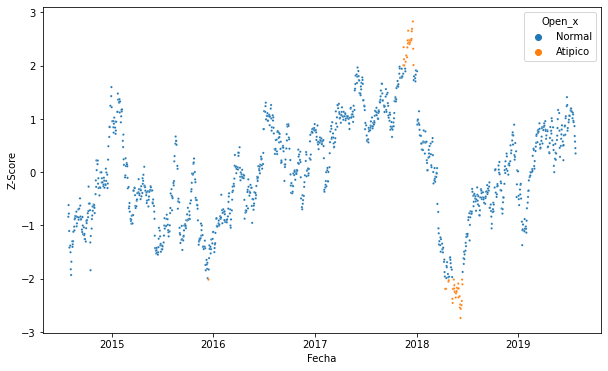

In [95]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.scatterplot(x=datos_z.Fecha, y=datos_z.Open, hue=datos_z['Open_x'], s=5)
ax.set_ylabel('Z-Score')

Distancia Multiple

In [96]:
data_multiple = datos_z.drop(columns=['Open_x', 'Fecha'])
data_multiple.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [97]:
def outlier_euclideano_d(x,cutoff):
  # x: dataframe con valors numericos normalizados 
  result_ = pd.Series([0] * len(x.iloc[:,1]))
  data_mean = x.mean() # media de los datos_
  dist = np.sqrt(np.sum(((x-data_mean) ** 2),axis=1)) #Distancia euclideana 
  dist_mean = dist.mean() #media de las distancia
  dist_zscore = np.abs((dist - dist_mean) / dist.std())#z-score para las distancias
  result_[((dist_zscore > 3))] = 1
  return result_

In [98]:
euc_d = data_multiple.copy()
euc_d.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return
0,-0.836681,-0.653586,-0.705650,-0.572660,-1.367431,-0.827558,0.602511,1.660499
1,-0.616990,-0.672802,-0.662563,-0.799816,-1.498234,-0.553347,0.003335,-1.131735
2,-0.776982,-0.749671,-1.028803,-1.029364,-1.630418,-0.322331,2.664832,-1.575938
3,-1.104132,-1.184460,-1.225089,-1.347384,-1.813542,0.115425,0.560306,-1.545671
4,-1.414564,-1.290153,-1.311264,-1.359340,-1.820429,-0.314002,0.433434,0.368729


In [101]:
euc_d['outlier']=outlier_euclideano_d(euc_d,2)

In [107]:
out = euc_d[euc_d['outlier'] == 1]
out.head()

,Open,High,Low,Close,Adj Close,Volume_Millions,VolStat,Return,outlier
55,-0.712508,-0.824139,-1.134128,-1.218263,-1.657358,3.502349,2.928404,-3.149208,1
56,-1.319045,-1.383839,-1.715804,-1.660620,-1.914303,3.476006,3.348664,-2.199468,1
57,-1.839618,-1.294959,-1.711016,-1.266085,-1.685136,1.187409,4.350786,3.845375,1
272,0.063575,-0.012212,-0.619476,-0.728082,-1.114311,1.383754,5.253740,-4.720295,1
634,0.264163,0.398554,-0.210148,-0.340721,-0.281191,2.706253,5.168797,-3.569256,1


<AxesSubplot:xlabel='Open', ylabel='VolStat'>

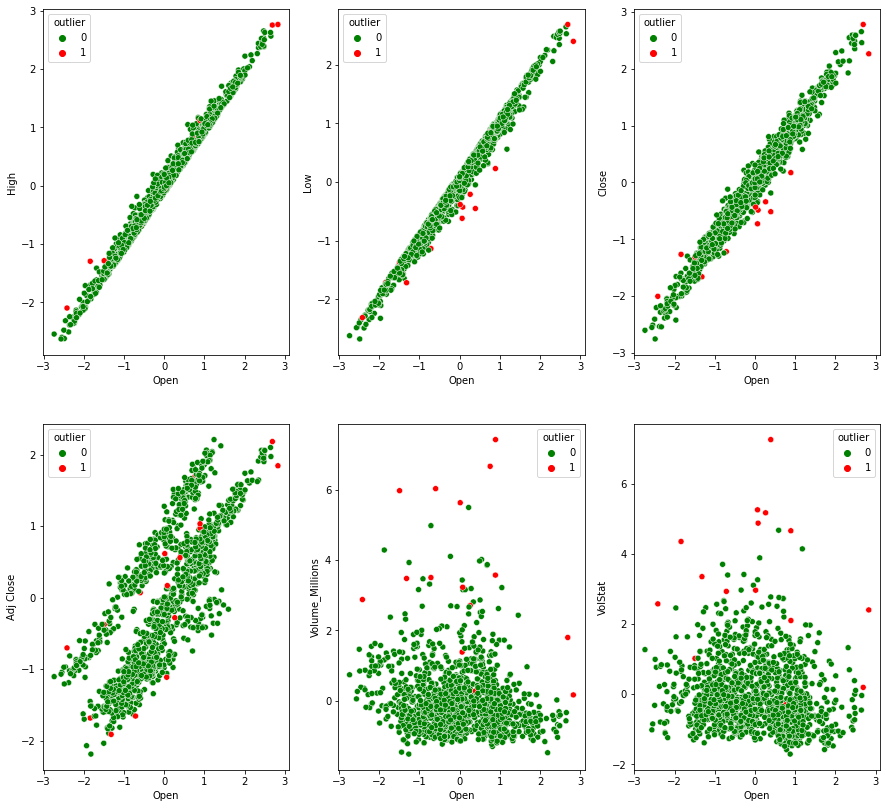

In [112]:
plt.figure(figsize=(15,14))
plt.subplot(2,3,1)
sns.scatterplot(x='Open', y='High', hue=euc_d['outlier'], data=euc_d, palette=["green", "red"])
plt.subplot(2,3,2)
sns.scatterplot(x='Open', y='Low', hue=euc_d['outlier'], data=euc_d, palette=["green", "red"])
plt.subplot(2,3,3)
sns.scatterplot(x="Open",y="Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,4)
sns.scatterplot(x="Open",y="Adj Close",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,5)
sns.scatterplot(x="Open",y="Volume_Millions",data=euc_d,hue="outlier",palette=["green","red"])
plt.subplot(2,3,6)
sns.scatterplot(x="Open",y="VolStat",data=euc_d,hue="outlier",palette=["green","red"])